# **Ozan Möhürcü**  
<p style="font-size: 1.5rem; font-weight: bold;">Data Analyst | Data Scientist </p>

Hello! I am Ozan, a data analyst who is open to learning and who improves myself in analytical thinking and producing data-driven solutions. I have successfully completed my analyst training and am currently focusing on data science and increasing my competencies in this field.

📊 What Do I Know?

I can extract meaningful results from data by working with Python, SQL and data visualization tools.
I am constantly improving myself in statistical analysis and reporting.
I aim to solve problems and support decision processes with the insights I obtain.

📚 What Am I Doing Right Now?
In my data science training, I am gaining knowledge on topics such as machine learning and big data analytics. In addition, I am looking for opportunities to put my theoretical knowledge into practice by gaining experience in real-world projects.

🎯 My Goal:
To contribute to the growth goals of companies by using my talents in data analysis and data science in a way that will create value in the business world. I am here to learn new information and to constantly improve by sharing my experiences.

If you would like to discuss projects, collaborate or share experiences, I would be happy to connect!


<div style="text-align: left; font-family: Arial, sans-serif; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/ozanmhrc/" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #0077B5; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">LinkedIn</span>
    </a>
    <a href="https://github.com/Ozan-Mohurcu" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #333; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">GitHub</span>
    </a>
    <a href="https://www.kaggle.com/ozanmhrc" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #20BEFF; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">Kaggle</span>
    </a>
</div>

<p style="font-family: 'Amiri'; font-size: 3rem; color: #FF0000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #FFFFFF; padding: 5px; border-radius: 15px; border: 7px solid #FF0000; width: 95%; line-height: 1;">˚About The Dataset˚</p>

#### - 🏢 *job_title* : The job title or role associated with the reported salary.
#### - 💼 *experience_level*	: The level of experience of the individual (e.g., Entry-level, Senior-level).
#### - ⏰ *employment_type* : Indicates whether the employment is full-time, part-time, etc.
#### - 🏠 *work_models* : Describes different working models (remote, on-site, hybrid).
#### - 📅 *work_year* : The specific year in which the salary information was recorded.
#### - 🌍 *employee_residence* : The residence location of the employee.
#### - 💵 *salary* : The reported salary in the original currency.
#### - 💱 *salary_currency*	: The currency in which the salary is denominated.
#### - 💲 *salary_in_usd*	: The converted salary in US dollars.
#### - 📍 *company_location* : The geographic location of the employing organization.
#### - 🏢 *company_size* : 	The size of the company, categorized by the number of employees.

<a id='1'></a>
<h2 style="background-color: #f6f5f5; color: #fe346e; font-size: 35px; font-family: garamond; font-weight: normal; border-radius: 100px 100px; text-align: center; border: 5px solid #FF0000;">1 ˚Load Libraries˚</h2>

In [2]:
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

<a id='1.2'></a>
<h2 style="background-color: #f6f5f5; color: #fe346e; font-size: 35px; font-family: garamond; font-weight: normal; border-radius: 100px 100px; text-align: center; border: 5px solid #FF0000;">1.2 ˚Load Dataset˚</h2>

In [3]:
df = pd.read_csv('data_science_salaries.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [4]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

<a id='2'></a>
<h2 style="background-color: #f6f5f5; color: #fe346e; font-size: 35px; font-family: garamond; font-weight: normal; border-radius: 100px 100px; text-align: center; border: 5px solid #FF0000;">2 ˚Visualization of Dataset˚</h2>

In [5]:
ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, title = 'Experience Level')
fig.show()

In [6]:
top15_job_titles = df['job_title'].value_counts()[:15]
fig = px.bar(y = top15_job_titles.values, x = top15_job_titles.index, 
            text = top15_job_titles.values, title = 'Top 15 Job Designations')
fig.update_layout(xaxis_title = "Job Designations", yaxis_title = "Count")
fig.show()

In [7]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

In [8]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.Reds,
                    title='Employee Location On Map')
fig.show()

In [9]:
top_10_emp_locations = residence[:10]
fig = px.bar(y = top_10_emp_locations.values, x = top_10_emp_locations.index, 
            color = top_10_emp_locations.index, text = top_10_emp_locations.values,
            title = 'Top 10 Locations of Employees')

fig.update_layout( xaxis_title = "Location of Employees", yaxis_title = "count")
fig.show()

In [10]:
country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = country
company_location = df['company_location'].value_counts()
top_10_company_location = company_location[:10]

fig = go.Figure(data = [
    go.Bar(name = 'Employee Residence', 
           x = top_10_emp_locations.index, y = top_10_emp_locations.values,
           text = top_10_emp_locations.values),
    go.Bar(name = 'Company Location', x = top_10_company_location.index, 
           y = top_10_company_location.values, text = top_10_company_location.values)])

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title='Comparison of Employee Residence and Company Location')

fig.show()

In [11]:
group = df['company_size'].value_counts()

fig = px.bar(y = group.values, x = group.index, 
             color = group.index, text = group.values,
             title = 'Distribution of Company Size')

fig.update_layout(xaxis_title = "Company Size", yaxis_title = "count")
fig.show()

In [12]:
work_year = df['work_year'].value_counts()
fig = px.pie(values = work_year.values, names = work_year.index, 
            title = 'Work year distribution')
fig.show()

In [13]:
fig = px.box(y = df['salary_in_usd'], title = 'Salary in USD')
fig.show()

In [14]:
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig.update_layout(title = 'Distribution Plot of Salary in USD') 
fig.show()

In [15]:
group = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

fig = px.bar(x = emp_type, y = group.values, 
       color = group.index, text = group.values, 
       title = 'Employment Type Distribution')

fig.update_layout( xaxis_title = "Employment Type", yaxis_title = "count")
fig.show()

In [16]:
remote_type = ['Fully Remote', 'Partially Remote', 'No Remote Work']

fig = px.bar(x = remote_type, y = df['work_models'].value_counts().values,
       color = remote_type, text = df['work_models'].value_counts().values,
       title = 'Remote Ratio Distribution')

fig.update_layout( xaxis_title = "Remote Type", yaxis_title = "count")
fig.show()

In [17]:
remote_year = df.groupby(['work_year','work_models']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)
ratio_2024 = np.round(remote_year[2024].values/remote_year[2024].values.sum(),2)

fig = go.Figure()
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
            r = ratio_2020, theta = categories, 
            fill = 'toself', name = '2020 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2021, theta = categories,
            fill = 'toself', name = '2021 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2022, theta = categories,
            fill = 'toself', name = '2022 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2023, theta = categories,
            fill = 'toself', name = '2023 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2024, theta = categories,
            fill = 'toself', name = '2024 remote ratio'))
fig.show()

In [18]:
exp_job = df.groupby(['experience_level','job_title']).size()

entry_top5 = exp_job['Entry-level'].sort_values(ascending = False)[:5]
executive_top5 = exp_job['Executive-level'].sort_values(ascending = False)[:5]
mid_top5 = exp_job['Mid-level'].sort_values(ascending = False)[:5]
senior_top5 = exp_job['Senior-level'].sort_values(ascending = False)[:5]

exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name = 'Entry-level/Junior', x = entry_top5.index, 
           y=entry_top5.values, text = entry_top5.values),
    go.Bar(name = 'Executive-level/Director', x = executive_top5.index,
           y = executive_top5.values, text = executive_top5.values),
    go.Bar(name = 'Mid-level/Intermediate', x = mid_top5.index,
           y = mid_top5.values, text = mid_top5.values ),
    go.Bar(name = 'Senior-level/Expert', x = senior_top5.index,
           y = senior_top5.values, text = senior_top5.values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level with top 5 job designations')
fig.show()


In [19]:
exp_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data = [
    go.Bar(name = 'Entry-level', x = exp_size['Entry-level'].index,
           y = exp_size['Entry-level'].values, text = exp_size['Entry-level'].values),
    go.Bar(name = 'Executive-level', x = exp_size['Executive-level'].index,
           y = exp_size['Executive-level'].values, text = exp_size['Executive-level'].values),
    go.Bar(name = 'Mid-level', x = exp_size['Mid-level'].index,
           y = exp_size['Mid-level'].values, text = exp_size['Mid-level'].values),
    go.Bar(name = 'Senior-level', x = exp_size['Senior-level'].index,
           y = exp_size['Senior-level'].values, text = exp_size['Senior-level'].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Experience Level with Company Size')

fig.show()

In [20]:
exp_location = df.groupby(['experience_level', 'company_location']).size()

entry_location = exp_location['Entry-level']
executive_location = exp_location['Executive-level']
mid_location = exp_location['Mid-level']
senior_location = exp_location['Senior-level']

fig1 = px.choropleth(locations=entry_location.index, color=entry_location.values,
                     title='Entry-level/Junior Company Location',
                     color_continuous_scale=px.colors.sequential.Reds)

fig2 = px.choropleth(locations=mid_location.index, color=mid_location.values,
                     title='Mid-level/Intermediate Company Location',
                     color_continuous_scale=px.colors.sequential.Reds) 

fig3 = px.choropleth(locations=senior_location.index, color=senior_location.values,
                     title='Senior-level/Expert Company Location',
                     color_continuous_scale=px.colors.sequential.Reds) 

fig4 = px.choropleth(locations=executive_location.index, color=executive_location.values,
                     title='Executive-level/Director Company Location',
                     color_continuous_scale=px.colors.sequential.Reds) 


fig1.add_scattergeo(locations=entry_location.index, text=entry_location.values, mode='text')
fig2.add_scattergeo(locations=mid_location.index, text=mid_location.values, mode='text')
fig3.add_scattergeo(locations=senior_location.index, text=senior_location.values, mode='text')
fig4.add_scattergeo(locations=executive_location.index, text=executive_location.values, mode='text')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [21]:
work_2020 = df.loc[(df['work_year'] == 2020)]
work_2021 = df.loc[(df['work_year'] == 2021)]
work_2022 = df.loc[(df['work_year'] == 2022)]
work_2023 = df.loc[(df['work_year'] == 2023)]
work_2024 = df.loc[(df['work_year'] == 2024)]
 
hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'], 
            work_2022['salary_in_usd'], work_2023['salary_in_usd']]
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])
year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2024'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns, 
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Mean Salary by Work Year'))

fig1.update_layout(title = 'Salary Distribution based on Work Year')
fig2.update_layout(xaxis_title = "Work Year", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()


In [22]:
exp_salary = df[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Entry-level']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'Executive-level']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Mid-level']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Senior-level']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Mean Salary by Experience Level'))
                            
fig1.update_layout(title = 'Salary Distribution based on Experience')
fig2.update_layout(xaxis_title = "Experience Level", yaxis_title = "Mean Salary (k) ")
fig1.show()
fig2.show()

In [23]:
salary_designation = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:] 

fig = px.bar(x=salary_designation['job_title'], 
             y=salary_designation['salary_in_usd'], 
             text=salary_designation['salary_in_usd'], 
             color=salary_designation['salary_in_usd'], 
             color_continuous_scale=px.colors.sequential.Reds) 

fig.update_layout(
    xaxis_title="Job Designation", 
    yaxis_title="Salaries",
    xaxis_tickangle=-45, 
    title="Top 25 Highest Salary by Designation"
)

fig.show()

In [24]:
salary_location = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
means = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations = means['company_location'], color = means['salary_in_usd'],
                    title = 'Average Salary by Company Location')
fig.show()

In [25]:
def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

In [26]:
def Word_Cloud(data, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width = 1200, height = 600, max_words = 50,
               background_color = 'white',
               max_font_size = 100, random_state = 42)
    wc.generate_from_frequencies(data)
    
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()

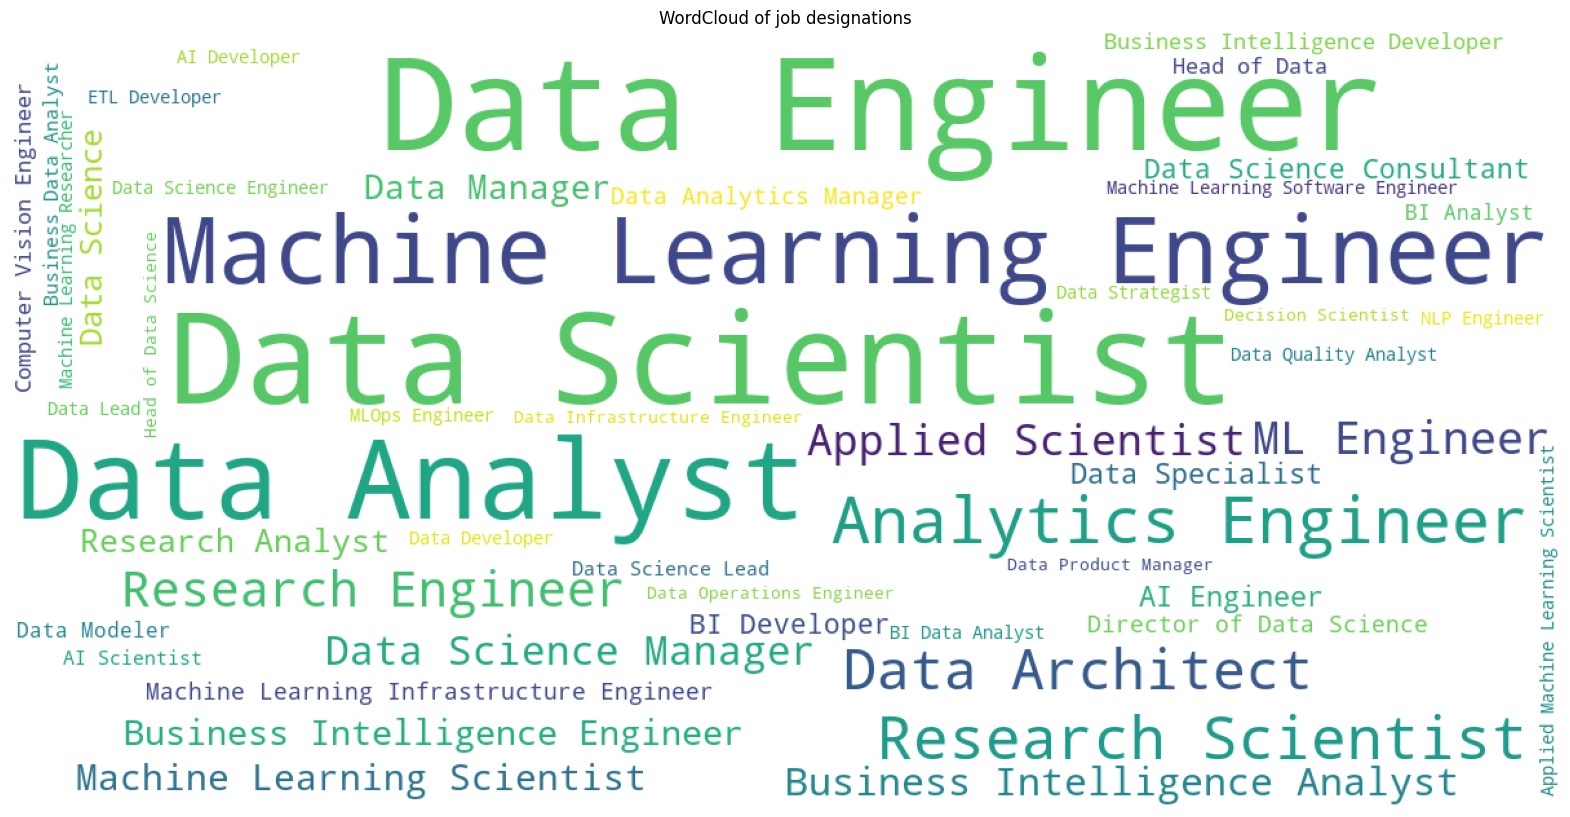

In [27]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data , 'WordCloud of job designations')

## 🎉 **Thank you to everyone who reviewed this far!** 🎉

🙏 **Thank you so much for your support and interest!** 🙏
I am grateful to each and every one of you for taking your valuable time to review this project.
I hope the information I provided was useful and everything about the project was as you expected. 🚀

💡 **If you have any questions or feedback, please feel free to let me know.** 💡

🔗 **See you in the next project!** 🔗